In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_excel("D:/Data Science/iNeuron/ML/Logistic/data/default of credit card clients.xls", header=1)

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [6]:
## Independent and dependent features
X = df.drop(labels=['ID', 'default payment next month'],axis=1)
Y = df[['default payment next month']]

In [7]:
X

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,3502,8979,5190,0,1837,3526,8998,129,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29998,80000,1,3,1,41,1,-1,0,0,0,...,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


In [8]:
Y

,default payment next month
0,1
1,1
2,0
3,0
4,0
...,...
29995,0
29996,0
29997,1
29998,1


In [9]:
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import OrdinalEncoder # Ordinal Encoding
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [10]:
# num_cols = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2',
#        'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
#        'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [11]:
## Numerical Pipeline
num_pipeline=Pipeline(
    steps=[
    # ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
    ]

)

# Categorigal Pipeline
# cat_pipeline=Pipeline(
#     steps=[
#     # ('imputer',SimpleImputer(strategy='most_frequent')),
#     ('ordinalencoder',OrdinalEncoder(categories=[Weather_conditions_cat,Road_traffic_density_cat, Type_of_order_cat, Type_of_vehicle_cat, Festival_cat, City_cat])),
#     ('scaler',StandardScaler())
#     ]

# )

preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,X.columns),
# ('cat_pipeline',cat_pipeline,categorical_cols)
])


In [12]:
## Train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=30)

In [13]:
X_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
777,20000,1,2,2,26,-1,-1,-1,-1,-2,...,451,-810,-420,1320,1261,451,0,780,2130,0
5436,150000,1,1,1,41,1,-2,-1,-1,-1,...,1600,5431,0,0,0,1800,5431,0,0,0
19260,250000,2,1,2,29,2,2,2,2,2,...,125721,122209,126129,127847,5900,4500,0,5954,3900,4826
2643,360000,1,1,1,39,1,-2,-2,-2,-1,...,0,0,691,7020,0,0,0,691,7020,0
26905,280000,1,2,1,44,0,0,0,0,0,...,122611,119023,113754,115029,7822,4529,4238,4305,4208,4003


In [14]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [15]:
X_train.head()

,num_pipeline__LIMIT_BAL,num_pipeline__SEX,num_pipeline__EDUCATION,num_pipeline__MARRIAGE,num_pipeline__AGE,num_pipeline__PAY_0,num_pipeline__PAY_2,num_pipeline__PAY_3,num_pipeline__PAY_4,num_pipeline__PAY_5,...,num_pipeline__BILL_AMT3,num_pipeline__BILL_AMT4,num_pipeline__BILL_AMT5,num_pipeline__BILL_AMT6,num_pipeline__PAY_AMT1,num_pipeline__PAY_AMT2,num_pipeline__PAY_AMT3,num_pipeline__PAY_AMT4,num_pipeline__PAY_AMT5,num_pipeline__PAY_AMT6
0,-1.139003,-1.231086,0.189892,0.855242,-1.031921,-0.872883,-0.720412,-0.694606,-0.665419,-1.532938,...,-0.667972,-0.683707,-0.669670,-0.629882,-0.259967,-0.219680,-0.284034,-0.262225,-0.169920,-0.289958
1,-0.138540,-1.231086,-1.076056,-1.060909,0.599775,0.901613,-1.558100,-0.694606,-0.665419,-0.647261,...,-0.651531,-0.586762,-0.662746,-0.652089,-0.333370,-0.166585,0.008592,-0.313948,-0.305063,-0.289958
2,0.631048,0.812291,-1.076056,0.855242,-0.705581,1.788862,1.792653,1.821359,1.910872,2.009769,...,1.124524,1.227215,1.416612,1.498716,0.010071,-0.060316,-0.284034,0.080871,-0.057618,-0.021965
3,1.477594,-1.231086,-1.076056,-1.060909,0.382216,0.901613,-1.558100,-1.533261,-1.524183,-0.647261,...,-0.674425,-0.671125,-0.651354,-0.533990,-0.333370,-0.237431,-0.284034,-0.268127,0.140338,-0.289958
4,0.861924,-1.231086,0.189892,-1.060909,0.926114,0.014365,0.117276,0.144049,0.193345,0.238416,...,1.080023,1.177725,1.212598,1.283075,0.121951,-0.059174,-0.055687,-0.028477,-0.038076,-0.067667


In [16]:
X_train['num_pipeline__SEX'].unique()

array([-1.23108594,  0.81229098])

In [17]:
y_train.head()

,default payment next month
777,0
5436,0
19260,1
2643,0
26905,0


In [20]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score, precision_recall_curve, roc_curve, ConfusionMatrixDisplay

In [21]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'SGDClassifier': SGDClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42),
    'SVC linear': SVC(kernel='linear'),
    'SVC rbf': SVC(kernel='rbf'),
    # 'NaiveBias':MultinomialNB(),
    # 'KNNR':KNeighborsClassifier(n_neighbors=5),
   
    'RandomForest':RandomForestClassifier(random_state=42),
    'AdaBoost':AdaBoostClassifier(),
    'Gradient Boosting':GradientBoostingClassifier(),
    'XGB':xgb.XGBClassifier(),
    'BaggingSVC':BaggingClassifier(estimator=SVC())
}

d:\Data Science\iNeuron\ML\Logistic\venv\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


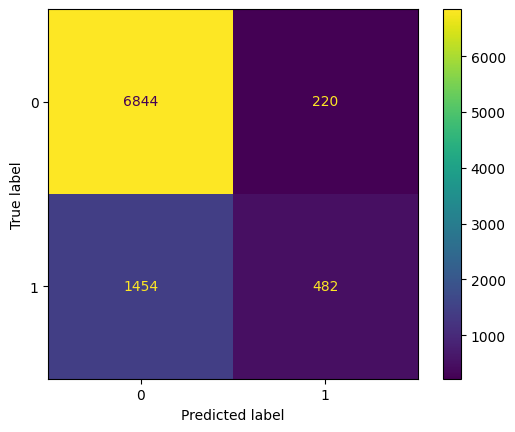

Logistic Regression
Model Training Performance
Score 81.39999999999999




d:\Data Science\iNeuron\ML\Logistic\venv\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


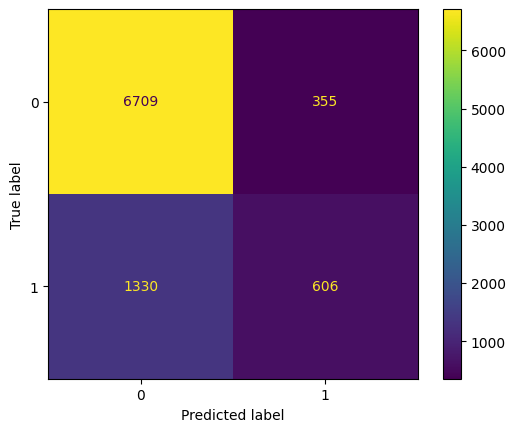

SGDClassifier
Model Training Performance
Score 81.27777777777779




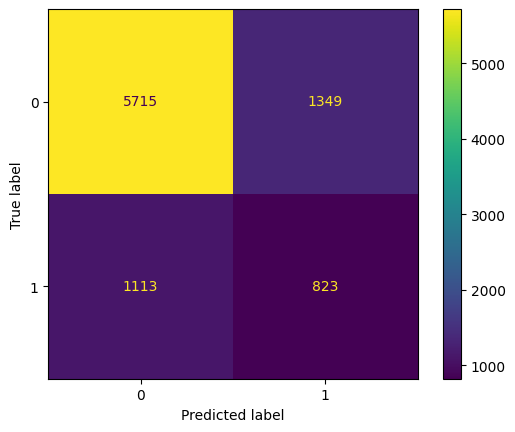

DecisionTreeClassifier
Model Training Performance
Score 72.64444444444445




d:\Data Science\iNeuron\ML\Logistic\venv\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


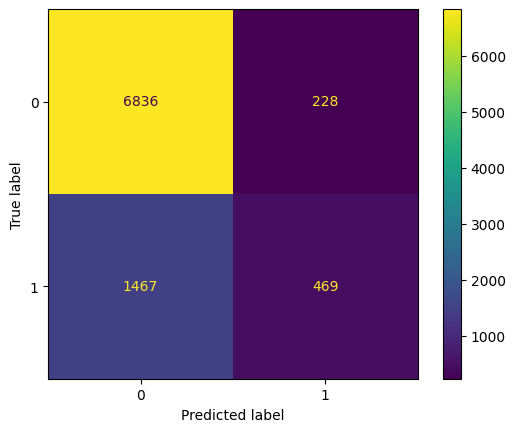

SVC linear
Model Training Performance
Score 81.16666666666667




d:\Data Science\iNeuron\ML\Logistic\venv\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


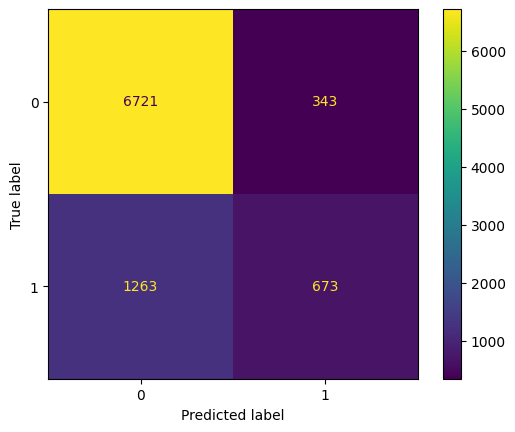

SVC rbf
Model Training Performance
Score 82.15555555555557




d:\Data Science\iNeuron\ML\Logistic\venv\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


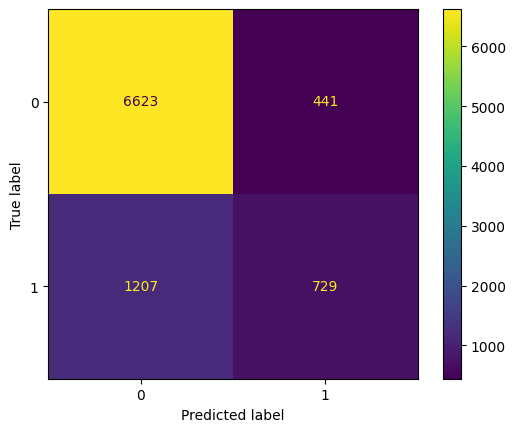

RandomForest
Model Training Performance
Score 81.68888888888888




d:\Data Science\iNeuron\ML\Logistic\venv\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


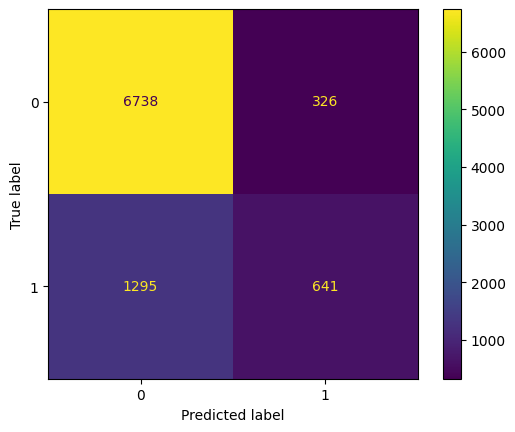

AdaBoost
Model Training Performance
Score 81.9888888888889




d:\Data Science\iNeuron\ML\Logistic\venv\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


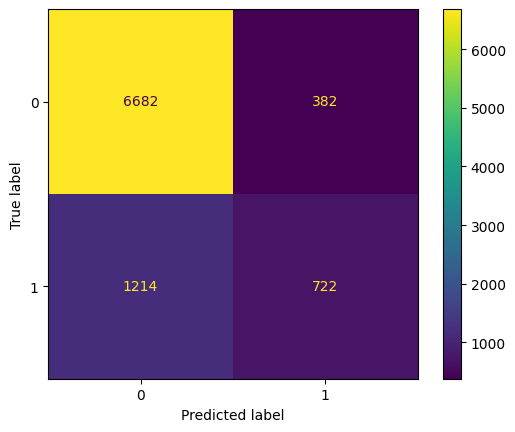

Gradient Boosting
Model Training Performance
Score 82.26666666666667




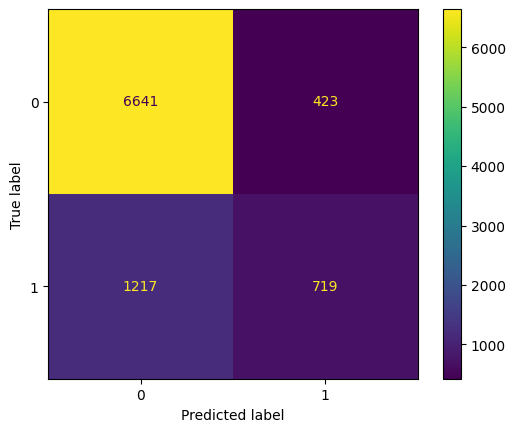

XGB
Model Training Performance
Score 81.77777777777779




d:\Data Science\iNeuron\ML\Logistic\venv\lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


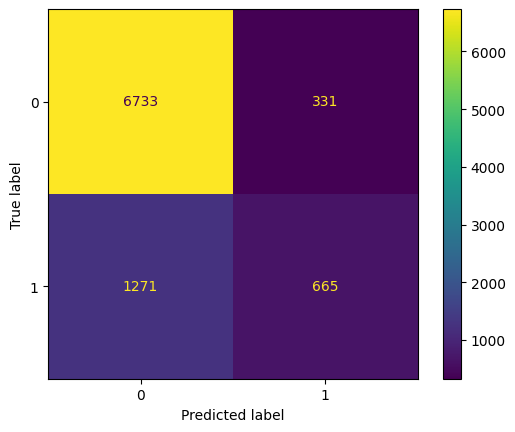

BaggingSVC
Model Training Performance
Score 82.19999999999999




In [22]:
trained_model_list = {'Model_Name':[], 'Model': [], 'Score': []}

for i in range(len(list(models))):
    model=list(models.values())[i]

    # Train  on training data
    model.fit(X_train,y_train)

    #Make Predictions
    y_pred=model.predict(X_test)

    score = accuracy_score(y_test,y_pred)


    print(list(models.keys())[i])

    print('Model Training Performance')
    print("Score",score*100)
    cm = confusion_matrix(y_test, y_pred)
    cm_dis = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    cm_dis.plot()
    plt.show()

    trained_model_list['Model_Name'].append(list(models.keys())[i])
    trained_model_list['Model'].append(model)
    trained_model_list['Score'].append(score*100)

    # trained_model_list.update({'Model_Name': list(models.keys())[i], 'Model': model, 'R2_Score': r2_square*100})

    print('='*35)
    print('\n')


In [30]:
pd.DataFrame(trained_model_list)

,Model_Name,Model,Score
0,Logistic Regression,LogisticRegression(random_state=42),81.400000
1,SGDClassifier,SGDClassifier(),79.688889
2,DecisionTreeClassifier,DecisionTreeClassifier(random_state=42),72.644444
3,SVC linear,SVC(kernel='linear'),81.166667
4,SVC rbf,SVC(),82.155556
5,RandomForest,"(DecisionTreeClassifier(max_features='sqrt', r...",81.688889
6,AdaBoost,"(DecisionTreeClassifier(max_depth=1, random_st...",81.988889
7,Gradient Boosting,([DecisionTreeRegressor(criterion='friedman_ms...,82.266667
8,XGB,"XGBClassifier(base_score=None, booster=None, c...",81.777778
9,BaggingSVC,"(SVC(random_state=1778023675), SVC(random_stat...",82.077778


In [38]:
index = trained_model_list['Score'].index(max(trained_model_list['Score']))
trained_model_list['Model_Name'][index]

'Gradient Boosting'

In [27]:
X.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [28]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[6733,  331],
       [1271,  665]], dtype=int64)

In [29]:
ConfusionMatrixDisplay(cm)
plt.show()

In [23]:
from tabpfn import TabPFNClassifier
model = TabPFNClassifier()
model.fit(X_train, y_train, overwrite_warning=True)

Loading model that can be used for inference only
Using a Transformer with 25.82 M parameters


d:\Data Science\iNeuron\ML\Logistic\venv\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


TabPFNClassifier()

In [24]:
y_pred = model.predict(X_test)

RuntimeError: [enforce fail at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\c10\core\impl\alloc_cpu.cpp:72] data. DefaultCPUAllocator: not enough memory: you tried to allocate 21168000000 bytes.

In [ ]:
accuracy_score(y_test, y_pred)